### Round 3 Analysis

In [4]:
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install scikit-learn
%pip install seaborn


[notice] A new release of pip available: 22.1.2 -> 24.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip available: 22.1.2 -> 24.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip available: 22.1.2 -> 24.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip available: 22.1.2 -> 24.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip available: 22.1.2 -> 24.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
# import sys
# sys.path.insert(0, './')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, ElasticNet
import csv
import seaborn as sns


In [6]:
path1 = f"./data/round_3/prices_round_3_day_0.csv"
path2 = f"./data/round_3/prices_round_3_day_1.csv"
path3 = f"./data/round_3/prices_round_3_day_2.csv"
# results_path = f"./data/round_3/algo_results.csv"

In [7]:
data1 = pd.read_csv(path1, delimiter=";", parse_dates=True)
data2 = pd.read_csv(path2, delimiter=";", parse_dates=True)
data3 = pd.read_csv(path3, delimiter=";", parse_dates=True)
# results_data = pd.read_csv(results_path, delimiter=";", parse_dates=True)

In [8]:
data = pd.concat([data1, data2, data3], ignore_index=True)
data

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,0,0,CHOCOLATE,7999,111,NaN,NaN,NaN,NaN,8001,111,NaN,NaN,NaN,NaN,8000.0,0.0
1,0,0,STRAWBERRIES,3999,210,NaN,NaN,NaN,NaN,4001,210,NaN,NaN,NaN,NaN,4000.0,0.0
2,0,0,ROSES,14999,72,NaN,NaN,NaN,NaN,15001,72,NaN,NaN,NaN,NaN,15000.0,0.0
3,0,0,GIFT_BASKET,71348,19,71347.0,24.0,NaN,NaN,71362,19,71363.0,24.0,NaN,NaN,71355.0,0.0
4,0,100,GIFT_BASKET,71344,1,71343.0,12.0,71342.0,20.0,71355,1,71356.0,12.0,71357.0,20.0,71349.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119995,2,999800,GIFT_BASKET,69537,2,69536.0,18.0,69535.0,24.0,69547,2,69548.0,18.0,69550.0,24.0,69542.0,0.0
119996,2,999900,CHOCOLATE,7749,143,NaN,NaN,NaN,NaN,7751,143,NaN,NaN,NaN,NaN,7750.0,0.0
119997,2,999900,GIFT_BASKET,69551,1,69550.0,19.0,69549.0,20.0,69561,1,69562.0,19.0,69564.0,20.0,69556.0,0.0
119998,2,999900,STRAWBERRIES,3984,240,NaN,NaN,NaN,NaN,3985,92,3986.0,148.0,NaN,NaN,3984.5,0.0


In [9]:
# data1["premium"] = data1["GIFT_BASKET"] - 4*data1["CHOCOLATE"] - 6*data1["STRAWBERRIES"] - data1["ROSES"]
data1

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,0,0,CHOCOLATE,7999,111,NaN,NaN,NaN,NaN,8001,111,NaN,NaN,NaN,NaN,8000.0,0.0
1,0,0,STRAWBERRIES,3999,210,NaN,NaN,NaN,NaN,4001,210,NaN,NaN,NaN,NaN,4000.0,0.0
2,0,0,ROSES,14999,72,NaN,NaN,NaN,NaN,15001,72,NaN,NaN,NaN,NaN,15000.0,0.0
3,0,0,GIFT_BASKET,71348,19,71347.0,24.0,NaN,NaN,71362,19,71363.0,24.0,NaN,NaN,71355.0,0.0
4,0,100,GIFT_BASKET,71344,1,71343.0,12.0,71342.0,20.0,71355,1,71356.0,12.0,71357.0,20.0,71349.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,0,999800,GIFT_BASKET,71131,19,71130.0,21.0,NaN,NaN,71145,19,71146.0,21.0,NaN,NaN,71138.0,0.0
39996,0,999900,CHOCOLATE,7987,124,NaN,NaN,NaN,NaN,7989,124,NaN,NaN,NaN,NaN,7988.0,0.0
39997,0,999900,GIFT_BASKET,71117,2,71116.0,16.0,71115.0,18.0,71128,2,71130.0,16.0,71131.0,18.0,71122.5,0.0
39998,0,999900,ROSES,14550,18,14549.0,46.0,NaN,NaN,14551,64,NaN,NaN,NaN,NaN,14550.5,0.0


In [10]:
# data_category_range = ['CHOCOLATE', 'STRAWBERRIES', 'ROSES', 'GIFT_BASKET']

# for i,value in enumerate(['CHOCOLATE', 'STRAWBERRIES', 'ROSES', 'GIFT_BASKET']):
# print(data1[data1['product'] == 'GIFT_BASKET']['mid_price'] - data1[data1['product'] == 'CHOCOLATE']['mid_price'])
# print(data1[data1['product'] == 'GIFT_BASKET']['mid_price'] - 4*data1[data1['product'] == 'CHOCOLATE']['mid_price'] - 6*data1[data1['product'] == 'STRAWBERRIES']['mid_price'] - data1[data1['product'] == 'ROSE']['mid_price'])


In [11]:
file_choco1 = f"./data/round_3/product_CHOCOLATE.csv"
file_straw1 = f"./data/round_3/product_STRAWBERRIES.csv"
file_rose1 = f"./data/round_3/product_ROSES.csv"
file_basket1 = f"./data/round_3/product_GIFT_BASKET.csv"

In [12]:
choco1 = pd.read_csv(file_choco1, delimiter=",", parse_dates=True)
straw1 = pd.read_csv(file_straw1, delimiter=",", parse_dates=True)
rose1 = pd.read_csv(file_rose1, delimiter=",", parse_dates=True)
basket1 = pd.read_csv(file_basket1, delimiter=",", parse_dates=True)

In [13]:
choco1

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,0,0,CHOCOLATE,7999,111,NaN,NaN,NaN,NaN,8001,111,NaN,NaN,NaN,NaN,8000.0,0.0
1,0,100,CHOCOLATE,8001,52,8000.0,95.0,NaN,NaN,8002,147,NaN,NaN,NaN,NaN,8001.5,0.0
2,0,200,CHOCOLATE,8000,152,NaN,NaN,NaN,NaN,8002,152,NaN,NaN,NaN,NaN,8001.0,0.0
3,0,300,CHOCOLATE,8002,44,8001.0,84.0,NaN,NaN,8003,128,NaN,NaN,NaN,NaN,8002.5,0.0
4,0,400,CHOCOLATE,8001,118,NaN,NaN,NaN,NaN,8003,118,NaN,NaN,NaN,NaN,8002.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,999500,CHOCOLATE,7987,60,7986.0,73.0,NaN,NaN,7988,133,NaN,NaN,NaN,NaN,7987.5,0.0
9996,0,999600,CHOCOLATE,7988,124,NaN,NaN,NaN,NaN,7989,51,7990.0,73.0,NaN,NaN,7988.5,0.0
9997,0,999700,CHOCOLATE,7987,138,NaN,NaN,NaN,NaN,7988,54,7989.0,84.0,NaN,NaN,7987.5,0.0
9998,0,999800,CHOCOLATE,7989,38,7988.0,81.0,NaN,NaN,7990,38,7991.0,81.0,NaN,NaN,7989.5,0.0


In [14]:
basket1['premium'] = basket1['mid_price'] - 4*choco1['mid_price'] - 6*straw1['mid_price'] - rose1['mid_price']

In [15]:
basket1

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,premium
0,0,0,GIFT_BASKET,71348,19,71347.0,24.0,NaN,NaN,71362,19,71363.0,24.0,NaN,NaN,71355.0,0.0,355.0
1,0,100,GIFT_BASKET,71344,1,71343.0,12.0,71342.0,20.0,71355,1,71356.0,12.0,71357.0,20.0,71349.5,0.0,346.5
2,0,200,GIFT_BASKET,71344,4,71339.0,1.0,71338.0,14.0,71350,1,71351.0,14.0,71352.0,21.0,71347.0,0.0,345.5
3,0,300,GIFT_BASKET,71345,2,71343.0,11.0,71342.0,29.0,71356,2,71357.0,11.0,71358.0,29.0,71350.5,0.0,343.5
4,0,400,GIFT_BASKET,71336,2,71335.0,13.0,71334.0,25.0,71347,2,71348.0,13.0,71349.0,25.0,71341.5,0.0,339.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,999500,GIFT_BASKET,71135,12,71134.0,19.0,NaN,NaN,71148,12,71149.0,19.0,NaN,NaN,71141.5,0.0,462.0
9996,0,999600,GIFT_BASKET,71132,2,71131.0,11.0,71130.0,19.0,71137,8,71143.0,2.0,71144.0,11.0,71134.5,0.0,446.5
9997,0,999700,GIFT_BASKET,71123,2,71122.0,11.0,71121.0,23.0,71134,2,71135.0,11.0,71136.0,23.0,71128.5,0.0,446.0
9998,0,999800,GIFT_BASKET,71131,19,71130.0,21.0,NaN,NaN,71145,19,71146.0,21.0,NaN,NaN,71138.0,0.0,447.5


<Axes: >

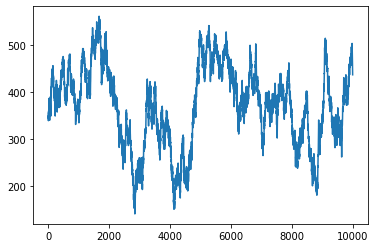

In [16]:
basket1['premium'].plot()

# So we are going to assume a basket premium of 370

In [17]:
prices = pd.read_csv(f"./data/round_3/data.csv",index_col="timestamp", delimiter=";")
prices

,day,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
timestamp,,,,,,,,,,,,,,,,
0,2,ROSES,14421,30,14420.0,42.0,NaN,NaN,14422,72,NaN,NaN,NaN,NaN,14421.5,0.0
0,2,STRAWBERRIES,4036,181,NaN,NaN,NaN,NaN,4037,181,NaN,NaN,NaN,NaN,4036.5,0.0
0,2,AMETHYSTS,9996,2,9995.0,25.0,NaN,NaN,10004,2,10005.0,25.0,NaN,NaN,10000.0,0.0
0,2,ORCHIDS,1053,7,1052.0,2.0,1046.0,46.0,1059,7,1060.0,2.0,1067.0,46.0,1056.0,0.0
0,2,STARFRUIT,5023,1,5022.0,27.0,NaN,NaN,5029,27,NaN,NaN,NaN,NaN,5026.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99900,2,AMETHYSTS,9998,3,9996.0,1.0,9995.0,20.0,10004,1,10005.0,20.0,NaN,NaN,10001.0,0.0
99900,2,STRAWBERRIES,4042,274,NaN,NaN,NaN,NaN,4044,274,NaN,NaN,NaN,NaN,4043.0,0.0
99900,2,STARFRUIT,5011,7,5010.0,21.0,NaN,NaN,5017,21,NaN,NaN,NaN,NaN,5014.0,0.0


In [18]:
data_AMETHYSTS = prices.loc[prices['product']=='AMETHYSTS'][['mid_price']].rename(columns={'mid_price': 'AMETHYSTS'})
data_STARFRUIT = prices.loc[prices['product']=='STARFRUIT'][['mid_price']].rename(columns={'mid_price': 'STARFRUIT'})
# data_pina_coladas = data.loc[data['product']=='PINA_COLADAS'][['mid_price']].rename(columns={'mid_price': 'pina_coladas'})
# data_coconuts = data.loc[data['product']=='COCONUTS'][['mid_price']].rename(columns={'mid_price': 'coconuts'})
# data_berries = data.loc[data['product']=='BERRIES'][['mid_price']].rename(columns={'mid_price': 'berries'})
# data_diving_gear = data.loc[data['product']=='DIVING_GEAR'][['mid_price']].rename(columns={'mid_price': 'diving_gear'})
# data_dolphin_sightings = data.loc[data['product']=='DOLPHIN_SIGHTINGS'][['mid_price']].rename(columns={'mid_price': 'dolphin_sightings'})
data_CHOCOLATE = prices.loc[prices['product']=='CHOCOLATE'][['mid_price']].rename(columns={'mid_price': 'CHOCOLATE'})
data_STRAWBERRIES = prices.loc[prices['product']=='STRAWBERRIES'][['mid_price']].rename(columns={'mid_price': 'STRAWBERRIES'})
data_GIFT_basket = prices.loc[prices['product']=='GIFT_BASKET'][['mid_price']].rename(columns={'mid_price': 'GIFT_basket'})
data_ROSES = prices.loc[prices['product']=='ROSES'][['mid_price']].rename(columns={'mid_price': 'ROSES'})
prices = pd.concat([data_AMETHYSTS, data_STARFRUIT, data_CHOCOLATE, data_STRAWBERRIES, data_GIFT_basket, data_ROSES], axis=1)
prices.columns = pd.MultiIndex.from_product([['mid_price'], prices.columns.tolist()])
prices

mid_price                                                      
          AMETHYSTS STARFRUIT CHOCOLATE STRAWBERRIES GIFT_basket    ROSES
timestamp                                                                
0           10000.0    5026.0    7889.0       4036.5     70598.5  14421.5
100          9997.0    5028.0    7889.5       4036.5     70615.5  14424.0
200         10000.0    5024.5    7890.5       4037.0     70617.5  14422.5
300         10000.0    5025.5    7890.0       4037.0     70615.5  14421.5
400         10000.0    5025.0    7890.0       4037.0     70629.5  14422.0
...             ...       ...       ...          ...         ...      ...
99500       10001.5    5013.5    7897.5       4043.5     70708.5  14402.0
99600       10000.0    5013.5    7899.5       4043.5     70717.5  14403.0
99700       10000.0    5010.5    7898.0       4043.5     70719.5  14402.5
99800        9997.0    5013.0    7898.5       4043.5     70726.0  14402.0
99900       10001.0    5014.0    7899.0       4043.0     70735.5  14406.0

[1000 rows x 6 columns]

array([<Axes: xlabel='timestamp'>, <Axes: xlabel='timestamp'>,
       <Axes: xlabel='timestamp'>, <Axes: xlabel='timestamp'>,
       <Axes: xlabel='timestamp'>, <Axes: xlabel='timestamp'>],
      dtype=object)

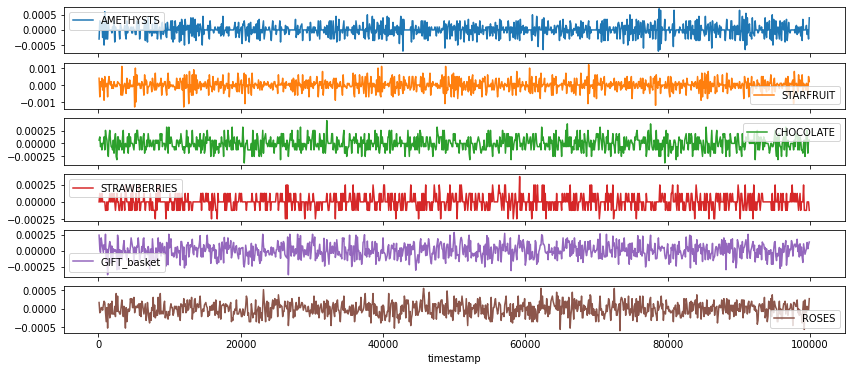

In [19]:
returns = np.log(prices['mid_price']/ prices['mid_price'].shift(1))
returns.dropna(inplace=True)
returns.plot(subplots=True, figsize=(14,6))

# Correlation Plots

array([[<Axes: xlabel='AMETHYSTS', ylabel='AMETHYSTS'>,
        <Axes: xlabel='STARFRUIT', ylabel='AMETHYSTS'>,
        <Axes: xlabel='CHOCOLATE', ylabel='AMETHYSTS'>,
        <Axes: xlabel='STRAWBERRIES', ylabel='AMETHYSTS'>,
        <Axes: xlabel='GIFT_basket', ylabel='AMETHYSTS'>,
        <Axes: xlabel='ROSES', ylabel='AMETHYSTS'>],
       [<Axes: xlabel='AMETHYSTS', ylabel='STARFRUIT'>,
        <Axes: xlabel='STARFRUIT', ylabel='STARFRUIT'>,
        <Axes: xlabel='CHOCOLATE', ylabel='STARFRUIT'>,
        <Axes: xlabel='STRAWBERRIES', ylabel='STARFRUIT'>,
        <Axes: xlabel='GIFT_basket', ylabel='STARFRUIT'>,
        <Axes: xlabel='ROSES', ylabel='STARFRUIT'>],
       [<Axes: xlabel='AMETHYSTS', ylabel='CHOCOLATE'>,
        <Axes: xlabel='STARFRUIT', ylabel='CHOCOLATE'>,
        <Axes: xlabel='CHOCOLATE', ylabel='CHOCOLATE'>,
        <Axes: xlabel='STRAWBERRIES', ylabel='CHOCOLATE'>,
        <Axes: xlabel='GIFT_basket', ylabel='CHOCOLATE'>,
        <Axes: xlabel='ROSES', ylabel='

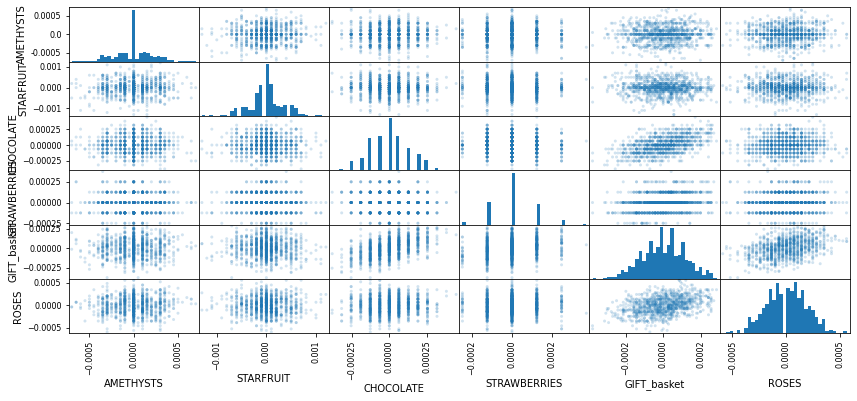

In [20]:
pd.plotting.scatter_matrix(returns, alpha=0.2, diagonal='hist', hist_kwds={'bins': 35}, figsize=(14,6))

<Axes: >

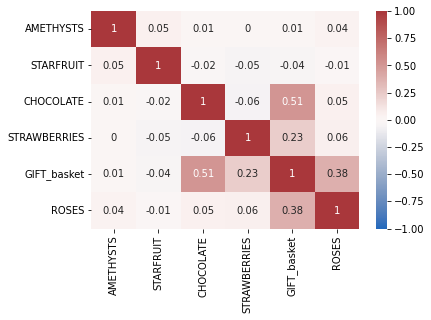

In [21]:
sns.heatmap(returns.corr().round(2), annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')

In [22]:
plt.rcParams["figure.figsize"] = (15,5)

In [23]:
d1 = pd.read_csv('./data/round_3/prices_round_3_day_0.csv', sep=';')
d2 = pd.read_csv('./data/round_3/prices_round_3_day_1.csv', sep=';')
d3 = pd.read_csv('./data/round_3/prices_round_3_day_2.csv', sep=';')

pricedata = pd.concat([d1, d2, d3]).fillna(0)

In [24]:
pricedata.head(15)

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,0,0,CHOCOLATE,7999,111,0.0,0.0,0.0,0.0,8001,111,0.0,0.0,0.0,0.0,8000.0,0.0
1,0,0,STRAWBERRIES,3999,210,0.0,0.0,0.0,0.0,4001,210,0.0,0.0,0.0,0.0,4000.0,0.0
2,0,0,ROSES,14999,72,0.0,0.0,0.0,0.0,15001,72,0.0,0.0,0.0,0.0,15000.0,0.0
3,0,0,GIFT_BASKET,71348,19,71347.0,24.0,0.0,0.0,71362,19,71363.0,24.0,0.0,0.0,71355.0,0.0
4,0,100,GIFT_BASKET,71344,1,71343.0,12.0,71342.0,20.0,71355,1,71356.0,12.0,71357.0,20.0,71349.5,0.0
5,0,100,CHOCOLATE,8001,52,8000.0,95.0,0.0,0.0,8002,147,0.0,0.0,0.0,0.0,8001.5,0.0
6,0,100,ROSES,14999,66,0.0,0.0,0.0,0.0,15001,66,0.0,0.0,0.0,0.0,15000.0,0.0
7,0,100,STRAWBERRIES,3999,265,0.0,0.0,0.0,0.0,4000,265,0.0,0.0,0.0,0.0,3999.5,0.0
8,0,200,ROSES,15000,61,0.0,0.0,0.0,0.0,15001,21,15002.0,40.0,0.0,0.0,15000.5,0.0
9,0,200,GIFT_BASKET,71344,4,71339.0,1.0,71338.0,14.0,71350,1,71351.0,14.0,71352.0,21.0,71347.0,0.0


In [25]:
# 1 gift basket = 1 rose, 4 chocolates, 6 strawberries

choco = pricedata[pricedata['product'] == 'CHOCOLATE']
straw = pricedata[pricedata['product'] == 'STRAWBERRIES']
rose = pricedata[pricedata['product'] == 'ROSES']
basket = pricedata[pricedata['product'] == 'GIFT_BASKET']
choco

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,0,0,CHOCOLATE,7999,111,0.0,0.0,0.0,0.0,8001,111,0.0,0.0,0.0,0.0,8000.0,0.0
5,0,100,CHOCOLATE,8001,52,8000.0,95.0,0.0,0.0,8002,147,0.0,0.0,0.0,0.0,8001.5,0.0
10,0,200,CHOCOLATE,8000,152,0.0,0.0,0.0,0.0,8002,152,0.0,0.0,0.0,0.0,8001.0,0.0
15,0,300,CHOCOLATE,8002,44,8001.0,84.0,0.0,0.0,8003,128,0.0,0.0,0.0,0.0,8002.5,0.0
16,0,400,CHOCOLATE,8001,118,0.0,0.0,0.0,0.0,8003,118,0.0,0.0,0.0,0.0,8002.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39981,2,999500,CHOCOLATE,7750,63,7749.0,78.0,0.0,0.0,7751,141,0.0,0.0,0.0,0.0,7750.5,0.0
39984,2,999600,CHOCOLATE,7750,35,7749.0,88.0,0.0,0.0,7751,35,7752.0,88.0,0.0,0.0,7750.5,0.0
39990,2,999700,CHOCOLATE,7750,48,7749.0,65.0,0.0,0.0,7751,113,0.0,0.0,0.0,0.0,7750.5,0.0
39994,2,999800,CHOCOLATE,7749,126,0.0,0.0,0.0,0.0,7751,126,0.0,0.0,0.0,0.0,7750.0,0.0


In [26]:
x100 = np.arange(0, 3000000, 100)

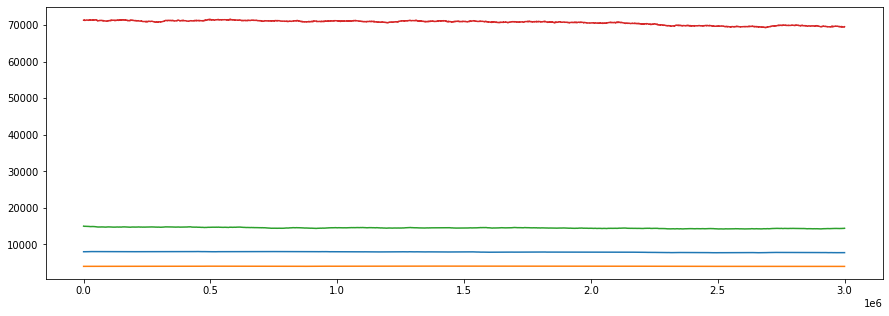

In [27]:
plt.plot(x100, choco['mid_price'])
plt.plot(x100, straw['mid_price'])
plt.plot(x100, rose['mid_price'])
plt.plot(x100, basket['mid_price'])
plt.show()

In [28]:
est_price = 4 * choco['mid_price'].to_numpy() + 6 * straw['mid_price'].to_numpy() + rose['mid_price'].to_numpy()
est_price

array([71000. , 71003. , 71001.5, ..., 69320.5, 69319.5, 69318.5])

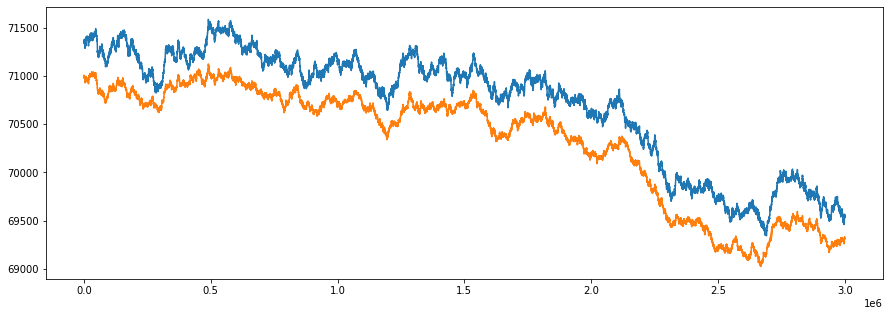

In [29]:
plt.plot(x100, basket['mid_price'])
plt.plot(x100, est_price)
plt.show()

In [30]:
nav = basket['mid_price'].to_numpy() / est_price

In [31]:
print(np.mean(nav))

1.005396959011905


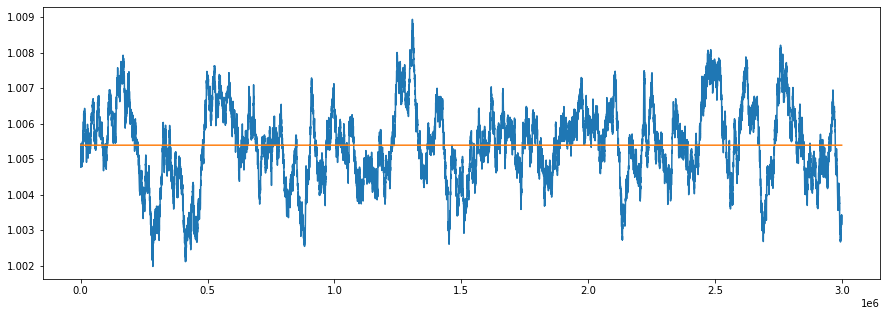

In [32]:
plt.plot(x100, nav)
plt.plot(x100, np.mean(nav) * np.ones(30000))
plt.show()

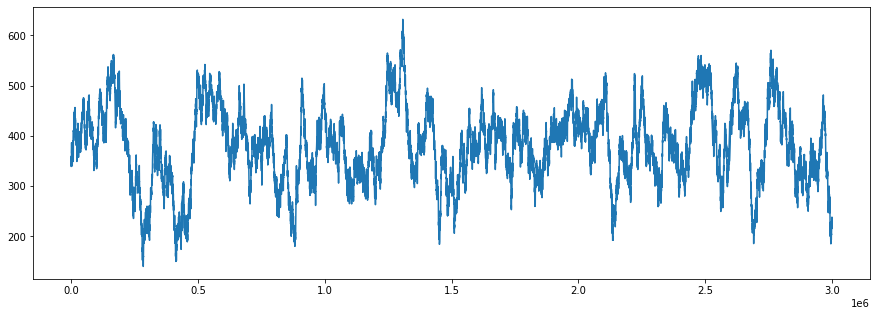

In [33]:
plt.plot(x100, basket['mid_price'] - est_price)
plt.show()

In [39]:
np.std(basket['mid_price'] - est_price)

76.42310842343252

In [35]:
np.std(nav)

0.0010909081453558348

In [37]:
np.mean(basket['mid_price'] - est_price)

379.4904833333333

In [40]:
np.mean(est_price)

70329.31015

In [41]:
np.std(est_price)

600.5477406628975

In [42]:
np.std(straw['mid_price'])

27.405575223133585

In [43]:
np.std(choco['mid_price'])

99.34436123456715

In [44]:
np.std(rose['mid_price'])

161.42099979958462

In [45]:
np.mean(straw['mid_price'])

4026.83735

In [46]:
np.mean(choco['mid_price'])

7915.34725

In [47]:
np.mean(rose['mid_price'])

14506.89705

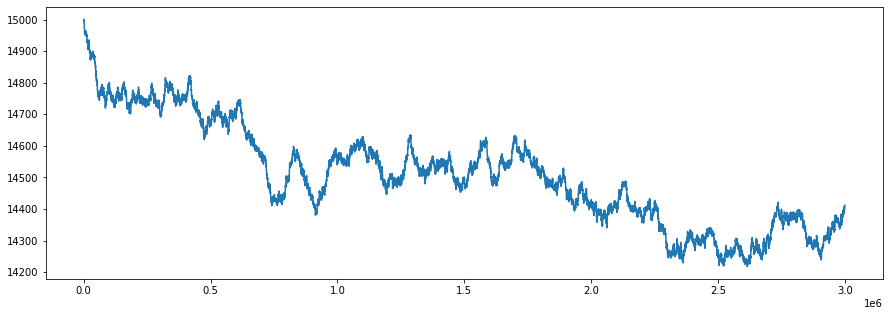

In [49]:
plt.plot(x100, rose['mid_price'])